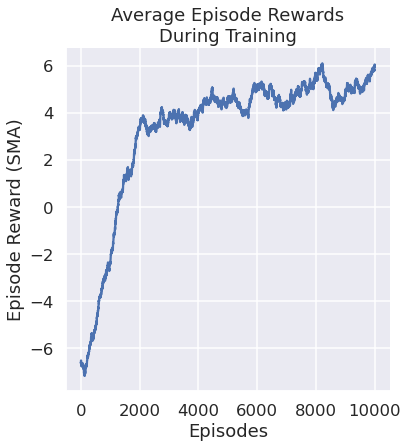

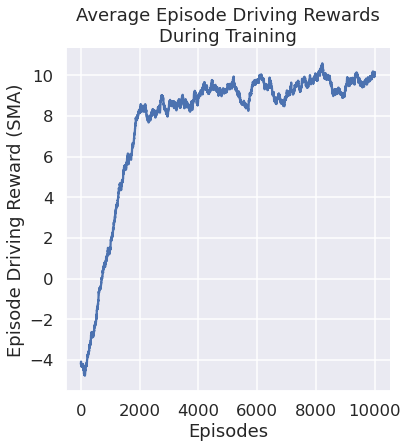

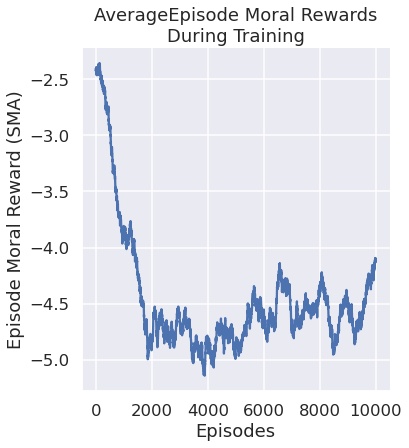

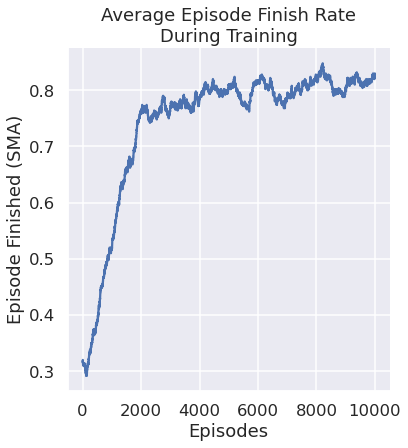

In [157]:
from pathlib import Path

import numpy as np
import seaborn as sns
from scipy.ndimage.filters import uniform_filter1d

plot_dir = Path('plots')
plot_dir.mkdir(parents=True, exist_ok=True)

logs_path = 'models/double_dqn_moral/double_dqn_moral_10000/logs.npz'
logs = np.load(logs_path)

rewards = logs['rewards']
driving_rewards = logs['driving_rewards']
moral_rewards = logs['moral_rewards']
finished = logs['finished'].astype(float)

average = 500
rewards_smooth = uniform_filter1d(rewards, average, mode='reflect')
driving_rewards_smooth = uniform_filter1d(driving_rewards, average, mode='reflect')
moral_rewards_smooth = uniform_filter1d(moral_rewards, 500, mode='reflect')
finished_smooth = uniform_filter1d(finished, average, mode='reflect')

sns.set_theme(context='talk', style='darkgrid', palette='deep')

g = sns.relplot(x=np.arange(len(rewards_smooth)), y=rewards_smooth, kind="line", height=6)
g.ax.set_title('Average Episode Rewards\nDuring Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Episode Reward (SMA)')
g.savefig(plot_dir / 'episode_rewards.png', dpi=150)

g = sns.relplot(x=np.arange(len(driving_rewards_smooth)), y=driving_rewards_smooth, kind="line", height=6)
g.ax.set_title('Average Episode Driving Rewards\nDuring Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Episode Driving Reward (SMA)')
g.savefig(plot_dir / 'episode_driving_rewards.png', dpi=150)

g = sns.relplot(x=np.arange(len(moral_rewards_smooth)), y=moral_rewards_smooth, kind="line", height=6)
g.ax.set_title('AverageEpisode Moral Rewards\nDuring Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Episode Moral Reward (SMA)')
g.savefig(plot_dir / 'episode_moral_rewards.png', dpi=150)

g = sns.relplot(x=np.arange(len(finished_smooth)), y=finished_smooth, kind="line", height=6)
g.ax.set_title('Average Episode Finish Rate\nDuring Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Episode Finished (SMA)')
g.savefig(plot_dir / 'episode_finish_rate.png', dpi=150)

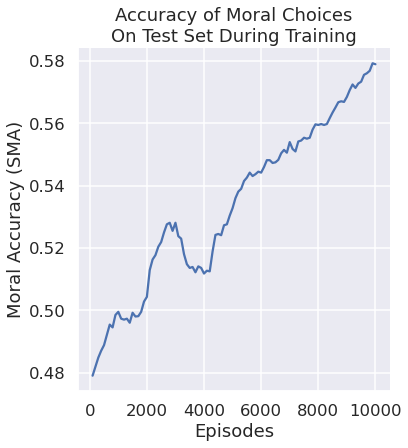

In [159]:
from pathlib import Path

import numpy as np
import seaborn as sns
from scipy.ndimage.filters import uniform_filter1d

plot_dir = Path('plots')
plot_dir.mkdir(parents=True, exist_ok=True)

accuracy_path = 'models/double_dqn_moral/double_dqn_moral_10000/accuracy.npy'
accuracy = np.load(accuracy_path)

average = 10
accuracy_smooth = uniform_filter1d(accuracy[:,1], average, mode='nearest')

sns.set_theme(context='talk', style='darkgrid', palette='deep')

g = sns.relplot(x=accuracy[:,0], y=accuracy_smooth, kind="line", height=6)
g.ax.set_title('Accuracy of Moral Choices\nOn Test Set During Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Moral Accuracy (SMA)')
g.savefig(plot_dir / 'moral_accuracy.png', dpi=300)